In [63]:
# CDS 503: Machine Learning
## ZHANG XULING
### 1 What type of attributes of the data?
###    all int
### 2 Explore the data to check, whether is it balance?
###    balance
### 3 What attribute is useful and what is not? why?
###    Maybe Semester is useless, teacher guidance should have nothing to do with the season.But if you delete it, the effect will be worse
### Compare the results using Naïve Bayes with the KNN


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
%matplotlib inline


In [2]:

from IPython.display import display
# Importing dataset', '
train = (pd.read_csv("tae.csv"))[:120]
test = (pd.read_csv("tae.csv"))[120:]
# see some of it, their overall statistics and dimensions
display(train.head(5))
display(train.describe())
display(train.shape)

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.800000,13.441667,7.975000,1.808333,28.658333,2.083333
std,0.401677,6.938864,6.844568,0.395263,12.536666,0.815638
min,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000
25%,2.000000,7.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,3.000000,2.000000,27.000000,2.000000
75%,2.000000,20.250000,15.000000,2.000000,38.000000,3.000000
max,2.000000,25.000000,25.000000,2.000000,66.000000,3.000000


(120, 6)

In [3]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,5]
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,5]

Number of mislabeled points out of a total 31 points : 14, performance 54.84%
bnb Number of mislabeled points out of a total 31 points : 24, performance 22.58%
mnb Number of mislabeled points out of a total 31 points : 20, performance 35.48%


Text(0.5, 25.722222222222214, 'Predicted label')

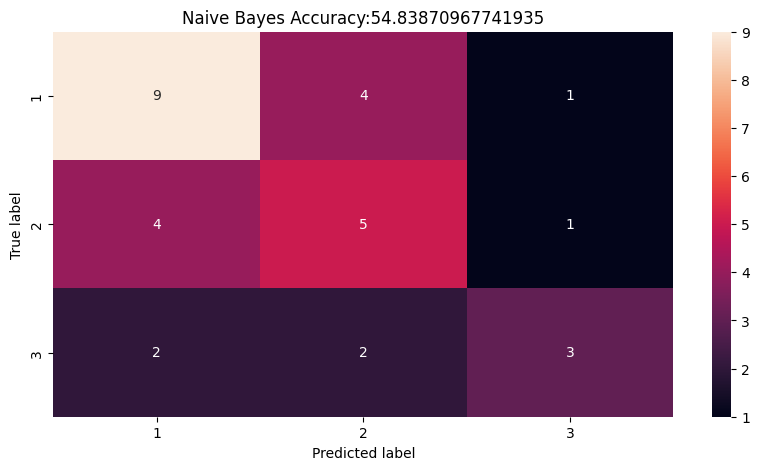

In [4]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# Instantiate the classifier
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
# Train classifier
gnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
# Test the classifier
predict = gnb.predict(x_test)
predictbnb = bnb.predict(x_test)
predictmnb = mnb.predict(x_test)
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
 .format(x_test.shape[0], (y_test != predict).sum(), 
 gnb.score(x_test,y_test)*100 ))
# Creates a confusion matrix
print("bnb Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
 .format(x_test.shape[0], (y_test != predictbnb).sum(), 
 bnb.score(x_test,y_test)*100 ))
print("mnb Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
 .format(x_test.shape[0], (y_test != predictmnb).sum(), 
 mnb.score(x_test,y_test)*100 ))



cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['1','2','3'], 
 columns = ['1','2','3'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
score

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
# predict the classes of new, unseen data
scores=[]
# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,30))
# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
 # input the train data to train KNN
 knn.fit(x_train,y_train)
 # see KNN prediction by inputting the test data
 y_pred=knn.predict(x_test)
 
 # append the performance metric (accuracy)
 scores.append(metrics.accuracy_score(y_test,y_pred))
 optimal_k = lrange[scores.index(max(scores))]
print(y_pred)
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))


[2 3 2 3 2 1 3 1 2 3 3 2 3 3 3 3 2 1 1 1 2 3 3 1 3 3 3 2 1 3 1]
The optimal number of neighbors is 18
The optimal score is 0.45


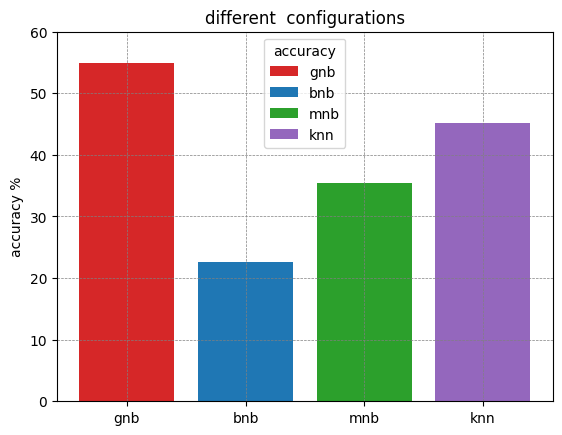

In [6]:
fig, ax = plt.subplots()

different = ['gnb', 'bnb', 'mnb','knn']
counts = [gnb.score(x_test,y_test)*100 , bnb.score(x_test,y_test)*100 , mnb.score(x_test,y_test)*100 , max(scores)*100]
bar_labels = ['gnb', 'bnb', 'mnb','knn']
bar_colors = ['tab:red', 'tab:blue', 'tab:green','tab:purple']

ax.bar(different, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('accuracy %')
ax.set_title('different  configurations')
ax.legend(title='accuracy')
plt.ylim(0,60)
plt.grid(color = 'grey',linestyle = '--', linewidth = 0.5)
plt.show()

Text(0.5, 25.722222222222214, 'Predicted label')

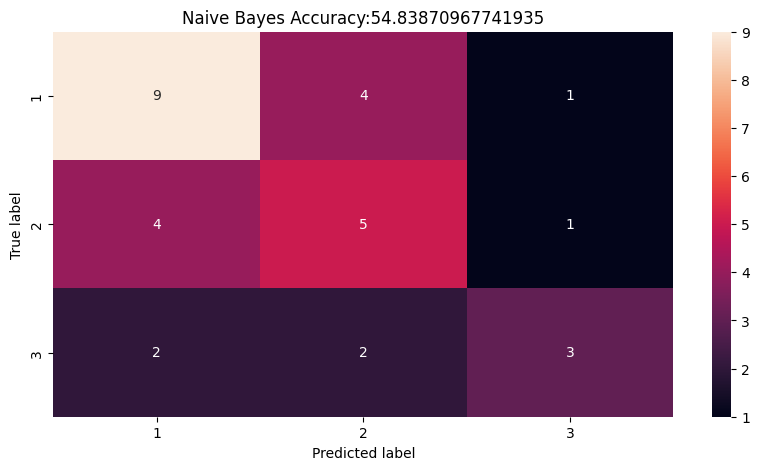

In [7]:
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['1','2','3'], 
 columns = ['1','2','3'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

   1  2  3
1  9  4  1
2  4  5  1
3  2  2  3


Text(0.5, 23.52222222222222, 'Predicted label')

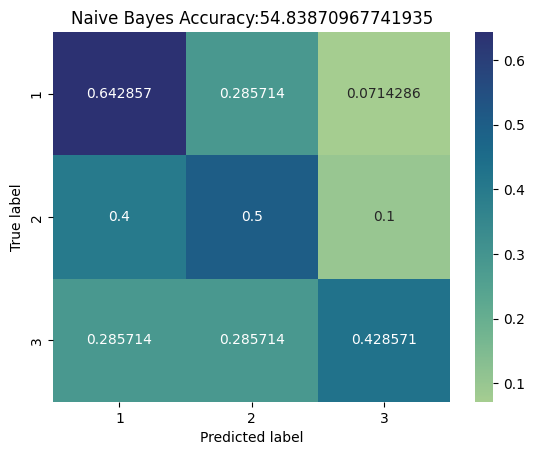

In [8]:
print(cm_df)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm_normalized, index = ['1','2','3'], 
 columns = ['1','2','3'])
ax= sns.heatmap(cm_df, annot=True, fmt='g',cmap="crest")
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [9]:
# import library for cross validation scoring
from sklearn.model_selection import cross_val_score
scores=[]
lrange=list(range(1,20))
GNB=GaussianNB()
 # get score for the 10 fold cross validation
score = cross_val_score(GNB, x_train, y_train, cv=15, scoring='accuracy')
scores.append(score.mean())
optimal_k = lrange[scores.index(max(scores))]
print("The optimal score is %.2f" % max(scores))

The optimal score is 0.53
